In [1]:
import numpy as np
import math
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# i= numbers of jump, j= how many steps have been made, N=total steps, j-i=numbers of down
def Coxtree(S0,N ,T, K, r, div,sigma):
    S = np.zeros([N+1,N+1])
    delta = T/N
    u = math.exp(sigma*math.sqrt(delta))
    d = math.exp(-sigma*math.sqrt(delta))
    for j in range(N+1):
        for i in range(j+1):
            S[i,j] = S0*u**i*d**(j-i)
    return S
           
        


In [3]:
#Cox, Ross and Rubinstein
def Cox(Vstock,N ,T, K, r, div,sigma):
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    u = math.exp(sigma*math.sqrt(delta))
    d = math.exp(-sigma*math.sqrt(delta))
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(K-Vstock[i,N],0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            Voption[i,j] = math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])
    return Voption
           


In [4]:
Vstock = Coxtree(100,2,1,105,0.01,0,0.3)
a = Cox(Vstock,2,1,105,0.01,0,0.3)[0,0]
a

13.930563470708558

In [5]:
E_Cox_value = []
for N in range(50,501):
    Vstock = Coxtree(100,N,1,105,0.01,0,0.3)
    value = Cox(Vstock,N,1,105,0.01,0,0.3)[0,0]
    E_Cox_value.append(value)
    



In [6]:
pd.DataFrame(E_Cox_value).to_excel("Q1-Cox.xlsx")

In [7]:
# Rendleman and Bartter
def RendlemanTree(S0,N ,T, K, r, div,sigma):
    S = np.zeros([N+1,N+1])
    delta = T/N
    u = math.exp((r-div-0.5*sigma**2)*delta + sigma*math.sqrt(delta))
    d = math.exp((r-div-0.5*sigma**2)*delta - sigma*math.sqrt(delta))
    for j in range(N+1):
        for i in range(j+1):
            S[i,j] = S0*u**i*d**(j-i)
    return S
           
        


def Rendleman(Vstock,N ,T, K, r, div,sigma):
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    u = math.exp((r-div-0.5*sigma**2)*delta+sigma*math.sqrt(delta))
    d = math.exp((r-div-0.5*sigma**2)*delta-sigma*math.sqrt(delta))
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(K-Vstock[i,N],0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            Voption[i,j] = math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])
    return Voption

In [8]:
E_Rendleman_value = []
for N in range(50,501):
    Vstock = RendlemanTree(100,N,1,105,0.01,0,0.3)
    value = Rendleman(Vstock,N,1,105,0.01,0,0.3)[0,0]
    E_Rendleman_value.append(value)

pd.DataFrame(E_Rendleman_value).to_excel("Q1-Rendleman.xlsx")  



In [9]:
def Black_scholes(S0,N ,T, K, r, div,sigma):
    #0.02 #0.5
    d1 = (np.log(S0/K)+(r+div+0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    d2 = d1-sigma*math.sqrt(T)
    nd1 = norm.cdf(-d1)
    nd2 = norm.cdf(-d2)
    
    BS_value = K*(nd2)*math.exp(-r*T)-S0*(nd1)
    return BS_value


In [10]:
E_BS_value = []
for N in range(50,501):
    value = Black_scholes(100,N,1,105,0.01,0,0.3)
    E_BS_value.append(value)

pd.DataFrame(E_BS_value).to_excel("Q1-BS.xlsx")  




In [11]:
def LeisenTree(S0,N ,T, K, r, div,sigma):
    S = np.zeros([N+1,N+1])
    delta = T/N
    d1 = (np.log(S0/K)+(r-div+0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    d2 = (np.log(S0/K)+(r-div-0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    q = 0.5+np.sign(d2)*math.sqrt((0.25-0.25*math.exp(-(d2/(N+1/3))**2*(N+1/6))))
    qstar=0.5+np.sign(d1)*math.sqrt((0.25-0.25*math.exp(-(d1/(N+1/3))**2*(N+1/6))))
    u = math.exp((r-div)*delta)*qstar/q
    d = (math.exp((r-div)*delta)-q*u)/(1-q)
    for j in range(N+1):
        for i in range(j+1):
            S[i,j] = S0*u**i*d**(j-i)
    return S
           
        


def Leisen(Vstock, S0, N ,T, K, r, div,sigma):
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    d1 = (np.log(S0/K)+(r-div+0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    d2 = (np.log(S0/K)+(r-div-0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    q = 0.5+np.sign(d2)*math.sqrt((0.25-0.25*math.exp(-(d2/(N+1/3))**2*(N+1/6))))
    qstar=0.5+np.sign(d1)*math.sqrt((0.25-0.25*math.exp(-(d1/(N+1/3))**2*(N+1/6))))
    u = math.exp((r-div)*delta)*qstar/q
    d = (math.exp((r-div)*delta)-q*u)/(1-q)
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(K-Vstock[i,N],0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            Voption[i,j] = math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])
    return Voption

In [12]:
E_Leisen_value = []
for N in range(51,501,2):
    Vstock = LeisenTree(100,N,1,105,0.01,0,0.3)
    value = Leisen(Vstock,100, N,1,105,0.01,0,0.3)[0,0]
    E_Leisen_value.append(value)
    

pd.DataFrame(E_Leisen_value).to_excel("Q1-Leisen.xlsx")  

    


In [13]:
BS = np.array(E_BS_value)
leisen = np.array(E_Leisen_value)-np.array([E_BS_value[0]]*225) #np.array(E_BS_value) #-np.ones(np.array(E_Leisen_value).shape)*E_BS_value[0]
rendleman = np.array(E_Rendleman_value)-np.array(E_BS_value)
cox = np.array(E_Cox_value)-np.array(E_BS_value)
n = range(50,501)
even=range(51,500,2)


Text(0.5, 0.98, 'CRR')

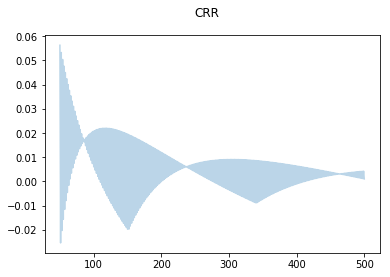

In [14]:
plt.plot(n,cox, alpha=0.3)
plt.suptitle('CRR')

Text(0.5, 0.98, 'LR')

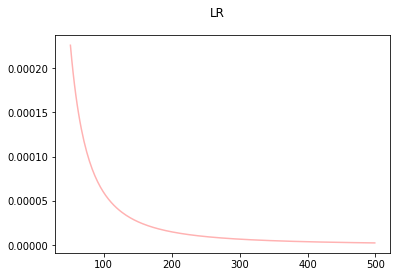

In [15]:
plt.plot(even,leisen,'r',alpha=0.3)
plt.suptitle('LR')

Text(0.5, 0.98, 'Q1-Put option')

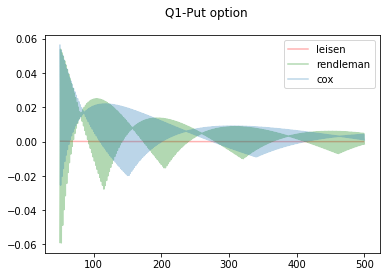

In [16]:
plt.plot(even,leisen,'r',alpha=0.3,label = 'leisen')
plt.plot(n, rendleman,'g',alpha=0.3, label = 'rendleman')
plt.plot(n,cox, alpha=0.3,label = 'cox')
plt.legend(loc='upper right')
plt.suptitle('Q1-Put option')

In [17]:
#Q1-e
Vnm = []
for n in range(50,275,25):
    m = 2*n
    v = (n**2*E_Cox_value[n-50]-m**2*E_Cox_value[m-50])/(n**2-m**2)
    Vnm.append(v)

Text(0.5, 0.98, 'Cox')

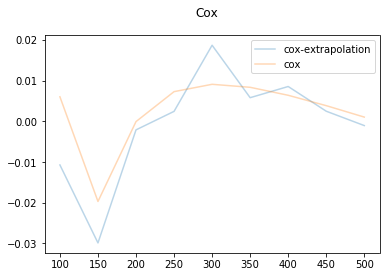

In [18]:
cox_extrapolation = np.array(Vnm)-np.array(E_BS_value[0])
n2 = range(100,501,50)

plt.plot(n2,cox_extrapolation, alpha=0.3,label = 'cox-extrapolation')
plt.plot(n2,cox[range(50,451,50)], alpha=0.3,label = 'cox')
plt.legend(loc='upper right')
plt.suptitle('Cox')

In [19]:
Rendlemannm = []
for n in range(50,275,25):
    m = 2*n
    v = (n**2*E_Rendleman_value[n-50]-m**2*E_Rendleman_value[m-50])/(n**2-m**2)
    Rendlemannm.append(v)

Text(0.5, 0.98, 'Rendleman')

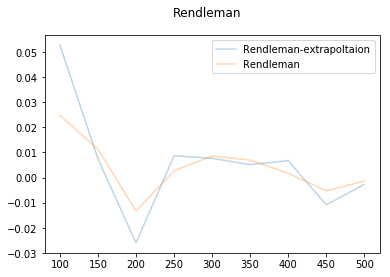

In [20]:
rendleman_extrapolation = np.array(Rendlemannm)-np.array(E_BS_value[0])
n2 = range(100,501,50)

plt.plot(n2,rendleman_extrapolation, alpha=0.3,label = 'Rendleman-extrapoltaion')
plt.plot(n2,rendleman[range(50,451,50)], alpha=0.3,label = 'Rendleman')
plt.legend(loc='upper right')
plt.suptitle('Rendleman')

In [21]:
LRnm = []
for n in range(50,275,25):
    m = 2*n-1
    a = int((n-51)/2)
    b = int((m-51)/2)
    v = (n**2*E_Leisen_value[a]-m**2*E_Leisen_value[b])/(n**2-m**2)
    LRnm.append(v)

Text(0.5, 0.98, 'LR')

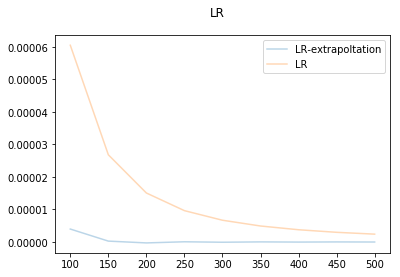

In [22]:
LR_extrapolation = np.array(LRnm)-np.array([E_BS_value[0]]*9)
n2 = range(100,501,50)

plt.plot(n2,LR_extrapolation, alpha=0.3,label = 'LR-extrapoltation')
plt.plot(n2,leisen[range(24,225,25)], alpha=0.3,label = 'LR')
plt.legend(loc='upper right')
plt.suptitle('LR')

In [23]:
def AmericanCox(Vstock,N ,T, K, r, div,sigma):
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    u = math.exp(sigma*math.sqrt(delta))
    d = math.exp(-sigma*math.sqrt(delta))
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(K-Vstock[i,N],0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            Voption[i,j] = max(math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1]),K-Vstock[i,j])
    return Voption


    
    

In [24]:
def AmericanBD(Vstock,N ,T, K, r, div,sigma):
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    u = math.exp(sigma*math.sqrt(delta))
    d = math.exp(-sigma*math.sqrt(delta))
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(K-Vstock[i,N],0)
    for i in range(N):
        BS = K*norm.cdf(-(np.log(Vstock[i,N-1]/K)+(r-div-0.5*sigma**2)*delta)/(sigma*math.sqrt(delta)))*math.exp(-r*delta)-Vstock[i,N-1]*norm.cdf(-(np.log(Vstock[i,N-1]/K)+(r-div+0.5*sigma**2)*delta)/(sigma*math.sqrt(delta)))
        Voption[i,N-1] = max(BS,K-Vstock[i,N-1])
    for j in range(N-2,-1,-1):
        for i in range(j+1):
            Voption[i,j] = max(math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1]),K-Vstock[i,j])          
    return Voption

In [25]:
def AmericanLeisen(Vstock, S0, N ,T, K, r, div,sigma):
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    d1 = (np.log(S0/K)+(r-div+0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    d2 = (np.log(S0/K)+(r-div-0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    q = 0.5+np.sign(d2)*math.sqrt((0.25-0.25*math.exp(-(d2/(N+1/3))**2*(N+1/6))))
    qstar=0.5+np.sign(d1)*math.sqrt((0.25-0.25*math.exp(-(d1/(N+1/3))**2*(N+1/6))))
    u = math.exp((r-div)*delta)*qstar/q
    d = (math.exp((r-div)*delta)-q*u)/(1-q)
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(K-Vstock[i,N],0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            Voption[i,j] = max(math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1]),K-Vstock[i,j])
    return Voption

In [26]:
Q2S= Coxtree(100,10000,1,105,0.01,0,0.3)
Q2option = AmericanCox(Q2S,10000,1,105,0.01,0,0.3 )
print(Q2option[0,0])

14.338026221177712


In [27]:
A_Cox_value = []
for N in range(50,501):
    Vstock = Coxtree(100,N,1,105,0.01,0,0.3)
    value = AmericanCox(Vstock,N,1,105,0.01,0,0.3)[0,0]
    A_Cox_value.append(value)
    
pd.DataFrame(A_Cox_value).to_excel("Q1-A_Cox.xlsx")


In [28]:
A_BD_value = []
for N in range(50,501):
    Vstock = Coxtree(100,N,1,105,0.01,0,0.3)
    value = AmericanBD(Vstock,N,1,105,0.01,0,0.3)[0,0]
    A_BD_value.append(value)

pd.DataFrame(A_BD_value).to_excel("Q1-A_BD.xlsx")  



In [29]:
A_Leisen_value = []
for N in range(51,501,2):
    Vstock = LeisenTree(100,N,1,105,0.01,0,0.3)
    value = AmericanLeisen(Vstock,100, N,1,105,0.01,0,0.3)[0,0]
    A_Leisen_value.append(value)
pd.DataFrame(A_Leisen_value).to_excel("Q1-A_Leisen.xlsx")  

    



In [30]:
A_leisen = np.array(A_Leisen_value)-np.array(Q2option[0,0]) #np.array(E_BS_value) #-np.ones(np.array(E_Leisen_value).shape)*E_BS_value[0]
A_BD = np.array(A_BD_value)-np.array(Q2option[0,0])
A_cox = np.array(A_Cox_value)-np.array(Q2option[0,0])
n = range(50,501)
even =range(51,500,2)



Text(0.5, 0.98, 'American put option error')

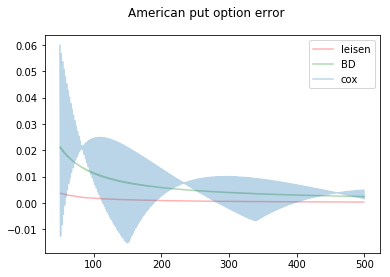

In [31]:
plt.plot(even,A_leisen,'r',alpha=0.3,label = 'leisen')
plt.plot(n, A_BD,'g',alpha=0.3, label = 'BD')
plt.plot(n,A_cox, alpha=0.3,label = 'cox')
plt.legend(loc='upper right')
plt.suptitle('American put option error')

In [32]:
#Q2c......
def AmericanBoundary(S0,N ,T, K, r, div,sigma):
    J = []
    boundary = []
    S = Coxtree(S0,N ,T, K, r, div,sigma)
    American = AmericanCox(S,N ,T, K, r, div,sigma)
    for j in range(N-1,-1,-1):
        b = 0
        for i in range(j+1):
            if American[i,j] == K-S[i,j]:
                b = max(b,S[i,j])
        boundary.append(b)
        J.append(j)
          
                

           
    return boundary, np.array(J)*(T/N), American, S

           



In [33]:
a = AmericanBoundary(100,100,1,105,0.01,0,0.3)
pd.DataFrame(a[1],a[0]).to_excel("Q2-A_boundary.xlsx")  

Text(0.5, 0.98, 'American put option boundary')

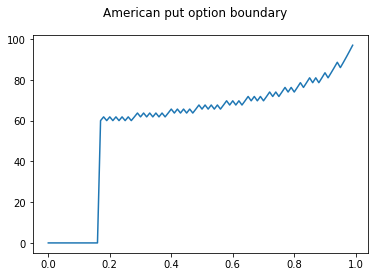

In [34]:
plt.plot(a[1],a[0])
plt.suptitle('American put option boundary')

In [35]:
def AmericanBoundary(S0,N ,T, K, r, div,sigma):
    J = []
    boundary = []
    S = Coxtree(S0,N ,T, K, r, div,sigma)
    
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    u = math.exp(sigma*math.sqrt(delta))
    d = math.exp(-sigma*math.sqrt(delta))
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(K-S[i,N],0)
    for j in range(N-1,-1,-1):
        b = 0
        for i in range(j+1):
            Voption[i,j] =max(math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1]),K-S[i,j])
            if (math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])) < (K-S[i,j]):
                b = max(b,S[i,j])
                
    
           
        boundary.append(b)
        J.append(j)
          
                

           
    return boundary, np.array(J)*(T/N)

           




In [36]:
a = AmericanBoundary(100,100,1,105,0.01,0,0.3)

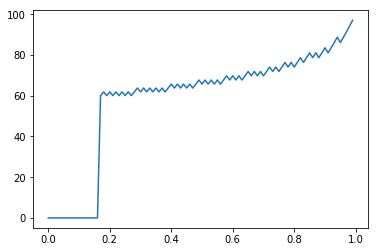

In [37]:
plt.plot(a[1],a[0])

In [38]:
#Q2-d
A_CRRnm = []
for n in range(50,275,25):
    m = 2*n
    v = (n**2*A_Cox_value[n-50]-m**2*A_Cox_value[m-50])/(n**2-m**2)
    A_CRRnm.append(v)

In [39]:
A_LRnm = []
for n in range(50,275,25):
    m = 2*n-1
    a = int((n-51)/2)
    b = int((m-51)/2)
    v = (n**2*A_Leisen_value[a]-m**2*A_Leisen_value[b])/(n**2-m**2)
    A_LRnm.append(v)

Text(0.5, 0.98, 'A_Cox')

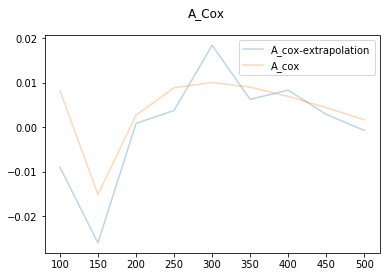

In [40]:
A_cox_extrapolation = np.array(A_CRRnm)-np.array(Q2option[0,0])
n2 = range(100,501,50)
plt.plot(n2,A_cox_extrapolation, alpha=0.3,label = 'A_cox-extrapolation')
plt.plot(n2,A_cox[range(50,451,50)], alpha=0.3,label = 'A_cox')
plt.legend(loc='upper right')
plt.suptitle('A_Cox')



In [41]:
A_BDmn = []
for n in range(50,275,25):
    m = 2*n
    v = (n**2*A_BD_value[n-50]-m**2*A_BD_value[m-50])/(n**2-m**2)
    A_BDmn.append(v)

Text(0.5, 0.98, 'A_BD')

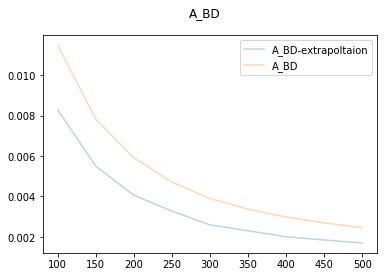

In [42]:
A_BD_extrapolation = np.array(A_BDmn)-np.array(Q2option[0,0])
n2 = range(100,501,50)
plt.plot(n2,A_BD_extrapolation, alpha=0.3,label = 'A_BD-extrapoltaion')
plt.plot(n2,A_BD[range(50,451,50)], alpha=0.3,label = 'A_BD')
plt.legend(loc='upper right')
plt.suptitle('A_BD')


Text(0.5, 0.98, 'A_LR')

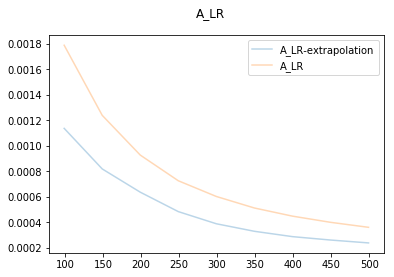

In [43]:
A_LR_extrapolation = np.array(A_LRnm)-np.array(Q2option[0,0])
n2 = range(99,501,50)
plt.plot(n2,A_LR_extrapolation, alpha=0.3,label = 'A_LR-extrapolation')
plt.plot(n2,A_leisen[range(24,225,25)], alpha=0.3,label = 'A_LR')
plt.legend(loc='upper right')
plt.suptitle('A_LR')


In [44]:
#Q3

def DowncallCox(Vstock,N ,T, K, r, div,sigma, B):
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    u = math.exp(sigma*math.sqrt(delta))
    d = math.exp(-sigma*math.sqrt(delta))
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(Vstock[i,N]-K,0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            if Vstock[i,j] < B :
                Voption[i,j] = 0
            else:
                Voption[i,j] = math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])
    return Voption

In [45]:
def DowncallRendleman(Vstock,N ,T, K, r, div,sigma, B):
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    u = math.exp((r-div-0.5*sigma**2)*delta+sigma*math.sqrt(delta))
    d = math.exp((r-div-0.5*sigma**2)*delta-sigma*math.sqrt(delta))
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(Vstock[i,N]-K,0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            if Vstock[i,j] < B :
                Voption[i,j] = 0
            else:
                Voption[i,j] = math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])
    return Voption

In [46]:
def DowncallLeisen(Vstock, S0, N ,T, K, r, div,sigma, B):
    delta = T/N
    Voption = np.zeros([N+1,N+1])
    d1 = (np.log(S0/K)+(r-div+0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    d2 = (np.log(S0/K)+(r-div-0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    q = 0.5+np.sign(d2)*math.sqrt((0.25-0.25*math.exp(-(d2/(N+1/3))**2*(N+1/6))))
    qstar=0.5+np.sign(d1)*math.sqrt((0.25-0.25*math.exp(-(d1/(N+1/3))**2*(N+1/6))))
    u = math.exp((r-div)*delta)*qstar/q
    d = (math.exp((r-div)*delta)-q*u)/(1-q)
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(Vstock[i,N]-K,0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            if Vstock[i,j] < B :
                Voption[i,j] = 0
            else:
                Voption[i,j] = math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])
    return Voption

In [47]:
def Down_Black_scholes(S0 ,T, K, r, div,sigma, B):
    
    d1 = (np.log(S0/K)+(r-div+0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    d2 = d1-sigma*math.sqrt(T)
    h1 = (np.log(B**2/(K*S0))+(r-div+0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    h2 = (np.log(B**2/(K*S0))+(r-div-0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    BS_value = S0*norm.cdf(d1)*math.exp(-div*T)-math.exp(-r*T)*K*norm.cdf(d2)-(B/S0)**(1+2*r*sigma**-2)*S0*norm.cdf(h1)+(B/S0)**(-1+2*r*sigma**-2)*K*math.exp(-r*T)*norm.cdf(h2)
    
    return BS_value



In [48]:
Down_Cox_value = []
for N in range(50,501):
    Vstock = Coxtree(100,N,0.5,100,0.1,0,0.3)
    value = DowncallCox(Vstock,N,0.5,100,0.1,0,0.3,95)[0,0]
    Down_Cox_value.append(value)
    
pd.DataFrame(Down_Cox_value).to_excel("Q3-Down_Cox.xlsx")




In [49]:
position = []
for N in range(50,501):
    Vstock = Coxtree(100,N,0.5,100,0.1,0,0.3)
    for i in range(N+1):
        if Vstock[i,N] > 95 :
            p = (Vstock[i,N]-95)/(Vstock[i,N]-Vstock[i-1,N])
            position.append(p)
            break


In [50]:
Down_Rendleman_value = []
for N in range(50,501):
    Vstock = RendlemanTree(100,N,0.5,100,0.1,0,0.3)
    value = DowncallRendleman(Vstock,N,0.5,100,0.1,0,0.3,95)[0,0]
    Down_Rendleman_value.append(value)

pd.DataFrame(Down_Rendleman_value).to_excel("Q3-Down_Rendleman.xlsx")  




In [51]:
Down_Leisen_value = []
for N in range(51,501,2):
    Vstock = LeisenTree(100,N,0.5,100,0.1,0,0.3)
    value = DowncallLeisen(Vstock,100,N,0.5,100,0.1,0,0.3,95)[0,0]
    Down_Leisen_value.append(value)
pd.DataFrame(Down_Leisen_value).to_excel("Q3-Down_Leisen.xlsx")  

    




In [52]:
Q3option = Down_Black_scholes(100, 0.5, 100, 0.1, 0, 0.3, 95)
print(Q3option)

5.617557334710028


In [65]:
Down_leisen = np.array(Down_Leisen_value)-np.array(Q3option) 
Down_rendleman = np.array(Down_Rendleman_value)-np.array(Q3option)
Down_cox = np.array(Down_Cox_value)-np.array(Q3option)
n = range(50,501)
even =range(51,500,2)

Text(0.5, 0.98, 'Downcall call option error')

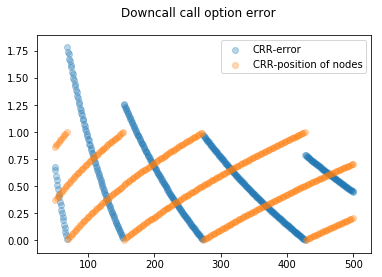

In [66]:
#plt.plot(even,Down_leisen,'r',alpha=0.3,label = 'leisen')
plt.scatter(n,Down_cox, alpha=0.3,label = 'CRR-error')
plt.scatter(n,position, alpha=0.3,label = 'CRR-position of nodes')
plt.legend(loc='upper right')
plt.suptitle('Downcall call option error')

In [55]:
#Q4
def four_DowncallCox(Vstock,N ,T, K, r, div,sigma, B):
    delta = T/N
    barrierstep = np.array([1,2,3,4])*N/5
    Voption = np.zeros([N+1,N+1])
    u = math.exp(sigma*math.sqrt(delta))
    d = math.exp(-sigma*math.sqrt(delta))
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(Vstock[i,N]-K,0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            if j  in barrierstep and Vstock[i,j] < B :
                Voption[i,j] = 0
            else:
                Voption[i,j] = math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])
    return Voption

In [56]:
def four_DowncallRendleman(Vstock,N ,T, K, r, div,sigma, B):
    delta = T/N
    barrierstep = np.array([1,2,3,4])*N/5
    Voption = np.zeros([N+1,N+1])
    u = math.exp((r-div-0.5*sigma**2)*delta+sigma*math.sqrt(delta))
    d = math.exp((r-div-0.5*sigma**2)*delta-sigma*math.sqrt(delta))
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(Vstock[i,N]-K,0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            if j  in barrierstep and Vstock[i,j] < B :
                Voption[i,j] = 0
            else:
                Voption[i,j] = math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])
    return Voption

In [57]:
def DowncallLeisen(Vstock, S0, N ,T, K, r, div,sigma, B):
    delta = T/N
    barrierstep = np.array([1,2,3,4])*N/5
    Voption = np.zeros([N+1,N+1])
    d1 = (np.log(S0/K)+(r-div+0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    d2 = (np.log(S0/K)+(r-div-0.5*sigma**2)*T)/(sigma*math.sqrt(T))
    q = 0.5+np.sign(d2)*math.sqrt((0.25-0.25*math.exp(-(d2/(N+1/3))**2*(N+1/6))))
    qstar=0.5+np.sign(d1)*math.sqrt((0.25-0.25*math.exp(-(d1/(N+1/3))**2*(N+1/6))))
    u = math.exp((r-div)*delta)*qstar/q
    d = (math.exp((r-div)*delta)-q*u)/(1-q)
    qu =(math.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    for i in range(N+1):
        Voption[i,N] = max(Vstock[i,N]-K,0)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            if j in barrierstep and Vstock[i,j] < B :
                Voption[i,j] = 0
            else:
                Voption[i,j] = math.exp(-r*delta)*(qd*Voption[i,j+1]+qu*Voption[i+1,j+1])
    return Voption

In [58]:
four_Down_Cox_value = []
for N in range(50,1001,10):
    Vstock = Coxtree(100,N,0.2,100,0.1,0,0.3)
    value = four_DowncallCox(Vstock,N,0.2,100,0.1,0,0.3,95)[0,0]
    four_Down_Cox_value.append(value)

pd.DataFrame(four_Down_Cox_value).to_excel("Q4-4Down_Cox.xlsx")

In [59]:
four_Down_cox = np.array(four_Down_Cox_value)-np.array(5.6711051343)
n = range(50,1001,10)

Text(0.5, 0.98, 'four-date Downcall call option error')

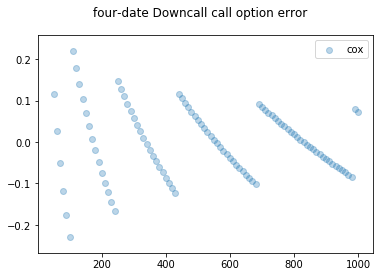

In [60]:
plt.scatter(n,four_Down_cox, alpha=0.3,label = 'cox')
plt.legend(loc='upper right')
plt.suptitle('four-date Downcall call option error')

In [61]:
Q4position = []
for N in range(50,1001,10):
    Vstock = Coxtree(100,N,0.2,100,0.1,0,0.3)
    for i in range(N+1):
        if Vstock[i,N] > 95 :
            p = (Vstock[i,N]-95)/(Vstock[i,N]-Vstock[i-1,N])
            Q4position.append(p)
            break



Text(0.5, 0.98, 'Four-date Downcall call option error')

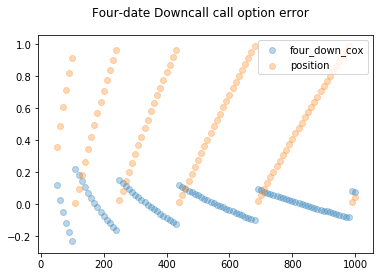

In [63]:
#plt.plot(even,Down_leisen,'r',alpha=0.3,label = 'leisen')
plt.scatter(n,four_Down_cox, alpha=0.3,label = 'four_down_cox')
plt.scatter(n,Q4position, alpha=0.3,label = 'position')
plt.legend(loc='upper right')
plt.suptitle('Four-date Downcall call option error')